In [1]:
from fundopt.fundtsloader import getTSLoader
import datetime as dt

C:\Users\hpcq_\.conda\envs\cvxpyenv\lib\site-packages\arctic-1.80.0-py3.8.egg\arctic\store\_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


In [17]:
start = dt.date(2020, 1, 1)
end   = dt.date(2021, 5, 14)
holding = 20
# test for MM funds
loader = getTSLoader('000198')
loader.load(start, end)

loader.getReturnTS(start, end, holding)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2021-05-10    0.001697
2021-05-11    0.001693
2021-05-12    0.001691
2021-05-13    0.001689
2021-05-14    0.001686
Freq: B, Name: return, Length: 358, dtype: float64

In [18]:
fund_ret = _

<AxesSubplot:>

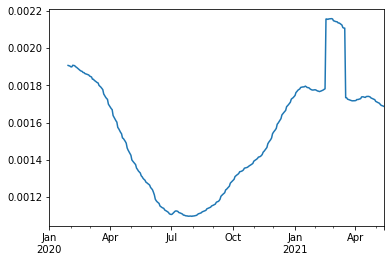

In [19]:
fund_ret.plot()

In [20]:
loader2 = getTSLoader('020005')

In [21]:
loader2.load(start, end)

In [22]:
loader2._rawData.index.max()

Timestamp('2021-05-14 00:00:00', freq='B')

In [26]:
ret20 = loader2.getReturnTS(start, end, 20)
ret10 = loader2.getReturnTS(start, end, 10)
ret5 = loader2.getReturnTS(start, end, 5)
ret1 = loader2.getReturnTS(start, end, 1)

<AxesSubplot:>

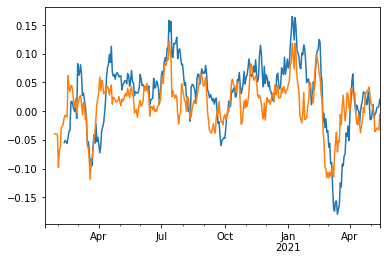

In [28]:
ret20.plot()
ret10.plot()

In [30]:
import pandas as pd

In [31]:
df=pd.read_pickle('2020-01-01_2021-05-14_20.pkl')

In [17]:
pd.concat([fund_ret, ret2], axis=1).head(30)

,return,0
2020-01-01,NaN,NaN
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
2020-01-10,NaN,NaN
2020-01-13,NaN,NaN
2020-01-14,NaN,NaN


In [19]:
loader2._rawData.to_csv('020005.csv')

<AxesSubplot:xlabel='NAV', ylabel='ACC_NAV'>

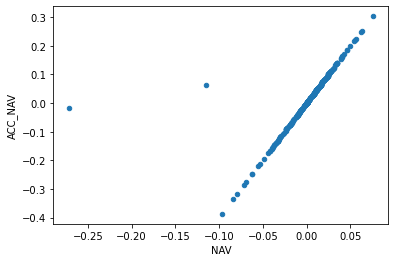

In [30]:
loader2._rawData.diff().plot.scatter('NAV', 'ACC_NAV')

In [36]:
diff_nav = loader2._rawData.diff().dropna() # remove the first entry

In [45]:
x = diff_nav['NAV']
y = diff_nav['ACC_NAV']

In [37]:
from scipy.stats import linregress

In [46]:
res = linregress(x, y)

In [47]:
b, a = res.intercept, res.slope

In [48]:
y_hat = a*x+b

In [49]:
residual = y - y_hat

In [52]:
import matplotlib.pyplot as plt

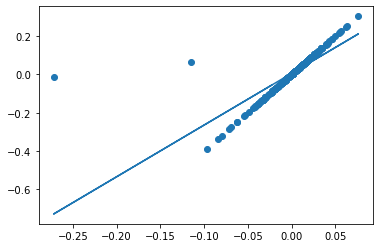

In [53]:
plt.plot(x, y_hat)
plt.scatter(x, y)

In [60]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor, LinearRegression

In [62]:
linear = LinearRegression(fit_intercept=False)
huber = HuberRegressor(fit_intercept=False)
theil = TheilSenRegressor(fit_intercept=False)
ransac = RANSACRegressor(base_estimator=LinearRegression(fit_intercept=False))

In [64]:
X = x[:, None]

In [66]:
linear.fit(X, y)
linear.coef_, linear.intercept_

(array([2.70112827]), 0.0)

In [65]:
huber.fit(X, y)
huber.coef_, huber.intercept_

(array([4.]), 0.0)

In [67]:
theil.fit(X, y)
theil.coef_, theil.intercept_

(array([4.]), 0.0)

In [ ]:
theil.score

In [69]:
ransac.fit(X, y)
ransac.estimator_.coef_, ransac.estimator_.intercept_

(array([3.99023127]), 0.0)

In [77]:
x = 5
y = 6
s = '{0}+{1}={2}, {1}+{0}={2}'.format(x, y, x+y)

In [105]:
s = f('{x:0%db}' % 4)

NameError: name 'f' is not defined

In [87]:
'%f' % 

'4.000000'

In [20]:
loader3 = getTSLoader('159909')

In [21]:
loader3.load(start, end)

<AxesSubplot:xlabel='NAV', ylabel='ACC_NAV'>

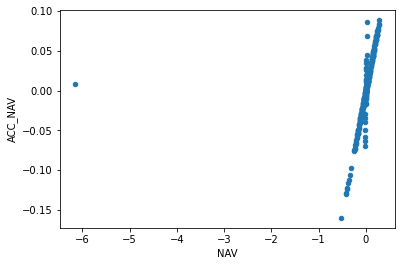

In [28]:
loader3._rawData.diff().plot.scatter('NAV', 'ACC_NAV')

In [29]:
loader3._rawData.diff().query('NAV < -1')

,NAV,ACC_NAV
2021-03-10,-6.1544,0.0079


In [ ]:
loader3._rawData